# Homework 4 Notes

First let's look at the NumPy `random` module, which we can use to generate pseudorandom numbers in an object-oriented style (creating a `default_rng` object)

In [20]:
from numpy.random import default_rng

# Setting a seed is important for reproducibility of code
seed = 19

# Here we create a instance of a rng, with the seed 65 
rng = default_rng(seed)

for i in range(3):
    print(rng.standard_normal())

# Testing average value of normal distribution

N = 100000
print("Average value of {N} samples:", sum([rng.standard_normal() for _ in range(N)]) / N)

-0.3700247693240037
0.994078692032213
0.41585748064632017
Average value of {N} samples: 0.0008285604872369366


## First, we read in the 4 images of Faces

In [21]:
# Importing dependencies
import numpy as np
import matplotlib.pyplot as plt

# Read in the four faces using plt.imread
fisher = plt.imread("faces/fisher.png")
stewart  = plt.imread("faces/stewart.png")
obama = plt.imread("faces/obama.png")
cranston = plt.imread("faces/cranston.png")

# Reshape 32 x 32 arrays into a long 1-d array 

# Put faces into an face array and then iterate over that face array, reshaping each image to be 964 x 1 arrays

face = [fisher, stewart, obama, cranston]
fnames = ["fisher",  "stewart", "obama", "cranston"]
n_faces = len(face)

(fx, fy) = fisher.shape
flen = fx * fy 
print("Image size: ", fx, fy)


Image size:  32 32


## Viewing the images

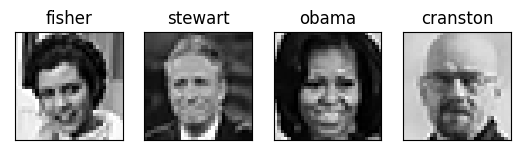

In [22]:
# Let's say we want to place each image onto the same figure, on 4 different axes

for i in range(n_faces):
    # Here we want to use subplot to create a subplot on a specific axes object in the figure]
    plt.subplot(1, 4, i+1)
    plt.imshow(face[i], cmap="gray") # FIXME: Add interpolation
    plt.xticks([])
    plt.yticks([])

    # Add title
    plt.title(fnames[i])


## Checking Image Properties

In [23]:
min_pixel_val = np.min(face[0])
max_pixel_val = np.max(face[0])

print("Max:", max_pixel_val)
print("Min:", min_pixel_val)

Max: 1.0
Min: 0.0


## Centering Image around 0 and reshape into 1d

In [24]:
# create an array to hold vectors of the four images
pats = np.zeros([n_faces, flen])

for i in range(n_faces):
    # reshape the image
    p = face[i].reshape((flen,))

    # turn each image into pattern from [-1 1]
    pats[i, :] = (p*2) - 1

    # normalize each pattern to be unit length
    pats[i, :] /= np.linalg.norm(pats[i, :])

In [25]:
# preallocate numpy array to hold vectors of the four images
pats = np.zeros([n_faces, flen])

for i in range(n_faces):
    # reshape image
    p = face[i].reshape((flen,))
    
    # turn each image into a pattern ranging [-1 1]
    pats[i, :] = (p*2)-1
    
    # normalize each pattern to be unit length
    pats[i, :] = pats[i, :] / np.linalg.norm(pats[i, :])

print(pats.shape, "should be 4", 32**2, "squared array")
print(pats[0][500:510], "should be values (activations) between [-1 1]")


(4, 1024) should be 4 1024 squared array
[-0.00135128 -0.03532629 -0.04922516 -0.04382004 -0.02721862 -0.04111748
 -0.03339589  0.01563623  0.01100327  0.01525015] should be values (activations) between [-1 1]


## Create Noisy Versions of each pattern to train network

In [26]:
# Step 1 - Create random number generator
# Step 2  - Use RNG to generate random samples from normal distribution, that we can add to each image in our training set
# Step 3 - Create some number of training patterns (with noise added to each pixel in array)

In [27]:
import numpy.random as r

# create noisy versions of the image patterns 
n_train = 500

# amount of noise
noise_scale = 0.07

# preallocate training pattern array
train_pats = np.zeros([n_train*n_faces, flen])

idx = 0
# create noisy training patterns
for j in range(n_train):
    for i in range(n_faces):
        
        # normal noise with 0 mean and stdev 
        unit_noise = r.randn(flen)*noise_scale
        
        # add face with noise to produce training data
        train_pats[idx, :] = pats[i, :] + unit_noise
        
        # normalize activation to unit length
        train_pats[idx, :] = train_pats[idx, :] / np.linalg.norm(train_pats[idx, :])
        
        idx += 1

## Displaying some of the noisy patterns

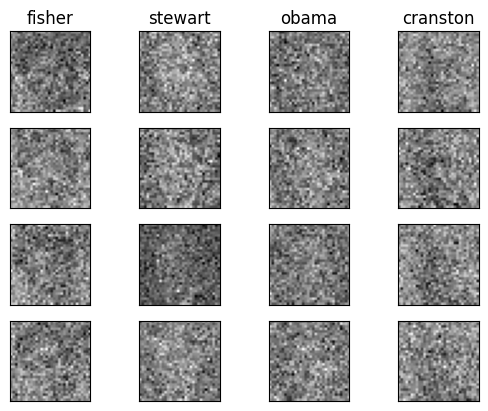

In [28]:
# you can play around with decreasing the noise level

for i in range(16):
    plt.subplot(4, 4, i+1)
    
    # reshape to square image
    this = train_pats[i, :].reshape([fx, fy])
    
    # convert back to [0 1] range
    this = (this+1)/2
    
    plt.imshow(this,'gray')
    
    plt.tick_params(axis='both',which='both',
          bottom=False,top=False,labelbottom=False,right=False,left=False,labelleft=False)   
    if i < 4:
        plt.title(fnames[i])

The `numpy.randn(dim1,dim2...)` returns a nd-array of samples from normal distribution, specifically a (`dim1, dim2`)-array of sampels from then normal curve